In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-ii-uci/online_retail_II.csv


In [2]:


import pandas as pd
import matplotlib.pyplot as plt

In [3]:


df=pd.read_csv('/kaggle/input/online-retail-ii-uci/online_retail_II.csv')



In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.shape

(1067371, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [8]:

import pandas as pd

df_limpio = df.dropna(subset=['Customer ID'])


df_limpio = df_limpio[df_limpio['Quantity'] > 0]


print("Dimensiones del DataFrame original:", df.shape)
print("Dimensiones del DataFrame limpio:", df_limpio.shape)


print("\nEstadísticas de 'Quantity' en el df_limpio:")
print(df_limpio['Quantity'].describe())

Dimensiones del DataFrame original: (1067371, 8)
Dimensiones del DataFrame limpio: (805620, 8)

Estadísticas de 'Quantity' en el df_limpio:
count    805620.000000
mean         13.307665
std         144.306739
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


In [9]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805620 non-null  object 
 1   StockCode    805620 non-null  object 
 2   Description  805620 non-null  object 
 3   Quantity     805620 non-null  int64  
 4   InvoiceDate  805620 non-null  object 
 5   Price        805620 non-null  float64
 6   Customer ID  805620 non-null  float64
 7   Country      805620 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


In [10]:

df_limpio['InvoiceDate'] = pd.to_datetime(df_limpio['InvoiceDate'])


df_limpio['Customer ID'] = df_limpio['Customer ID'].astype(int)


print(df_limpio.info())

<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  int64         
 7   Country      805620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 55.3+ MB
None


In [11]:

df_limpio['TotalPrice'] = df_limpio['Quantity'] * df_limpio['Price']


print(df_limpio.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  
0 2009-12-01 07:45:00   6.95        13085  United Kingdom        83.4  
1 2009-12-01 07:45:00   6.75        13085  United Kingdom        81.0  
2 2009-12-01 07:45:00   6.75        13085  United Kingdom        81.0  
3 2009-12-01 07:45:00   2.10        13085  United Kingdom       100.8  
4 2009-12-01 07:45:00   1.25        13085  United Kingdom        30.0  


In [12]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  int64         
 7   Country      805620 non-null  object        
 8   TotalPrice   805620 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 61.5+ MB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


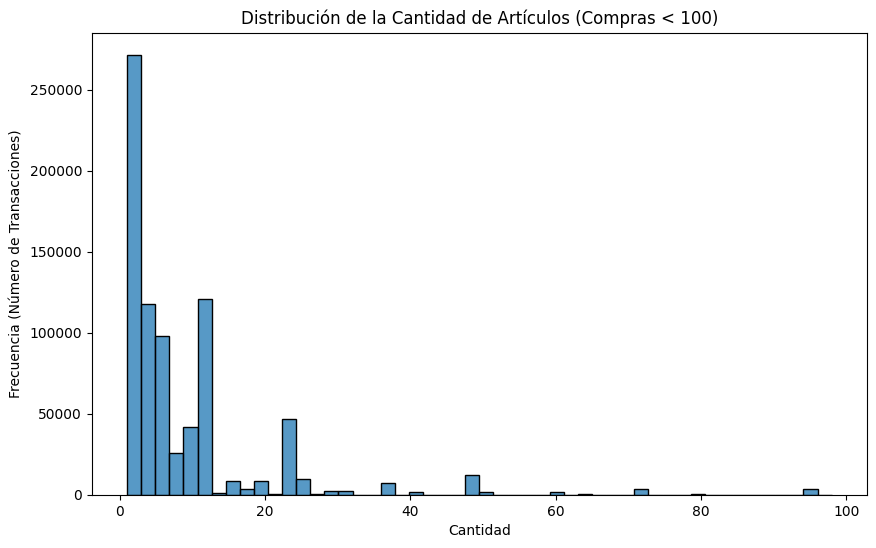

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


df_para_grafico = df_limpio[df_limpio['Quantity'] < 100]


plt.figure(figsize=(10, 6))
sns.histplot(df_para_grafico['Quantity'], bins=50)
plt.title('Distribución de la Cantidad de Artículos (Compras < 100)')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia (Número de Transacciones)')
plt.show()


### Columna Price

In [14]:
print(df_limpio['Price'].describe())


count    805620.000000
mean          3.206279
std          29.197901
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64


/tmp/ipykernel_19/3165900457.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df_limpio['TotalPrice'].resample('M').sum()


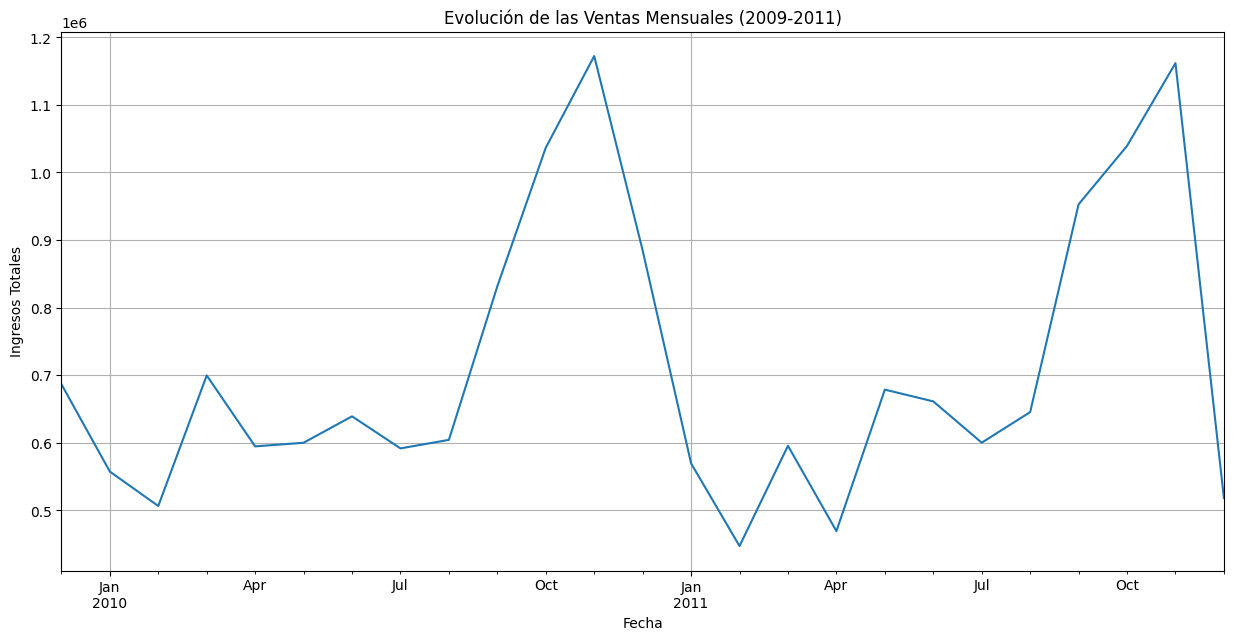

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


df_limpio.set_index('InvoiceDate', inplace=True)


ventas_mensuales = df_limpio['TotalPrice'].resample('M').sum()


plt.figure(figsize=(15, 7))
ventas_mensuales.plot(kind='line')
plt.title('Evolución de las Ventas Mensuales (2009-2011)')
plt.xlabel('Fecha')
plt.ylabel('Ingresos Totales')
plt.grid(True) 
plt.show()


df_limpio.reset_index(inplace=True)

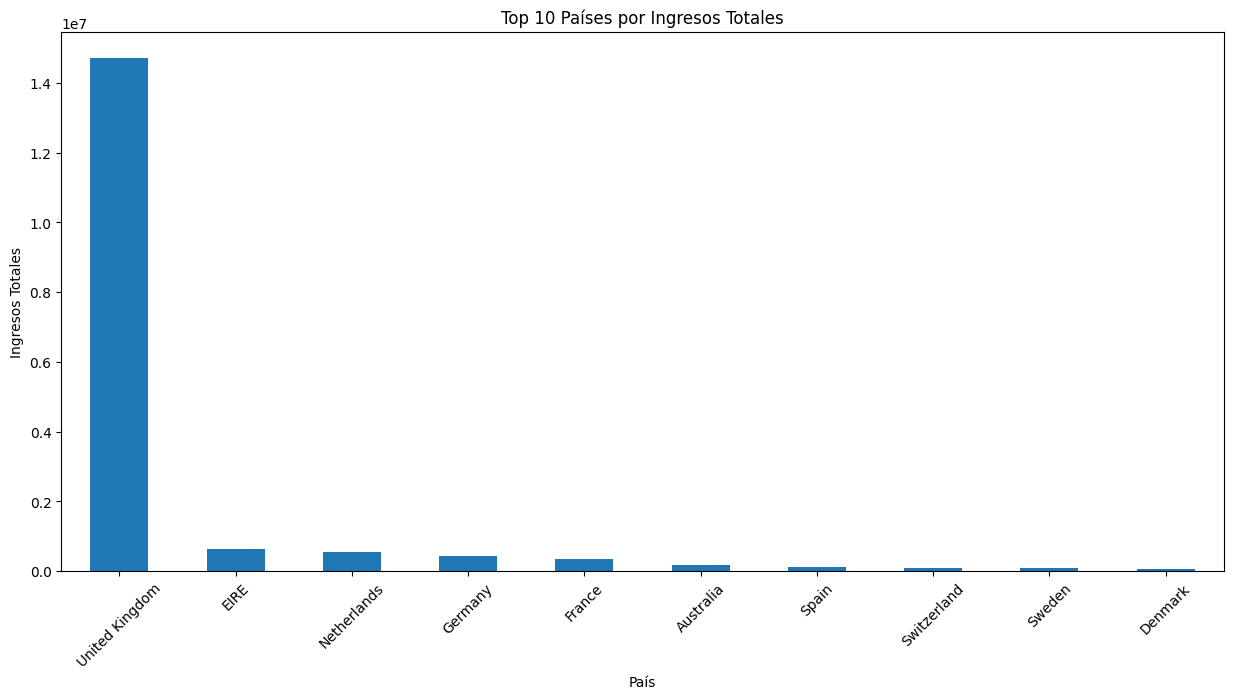

In [16]:

ventas_por_pais = df_limpio.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)


plt.figure(figsize=(15, 7))
ventas_por_pais.head(10).plot(kind='bar')
plt.title('Top 10 Países por Ingresos Totales')
plt.xlabel('País')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.show()

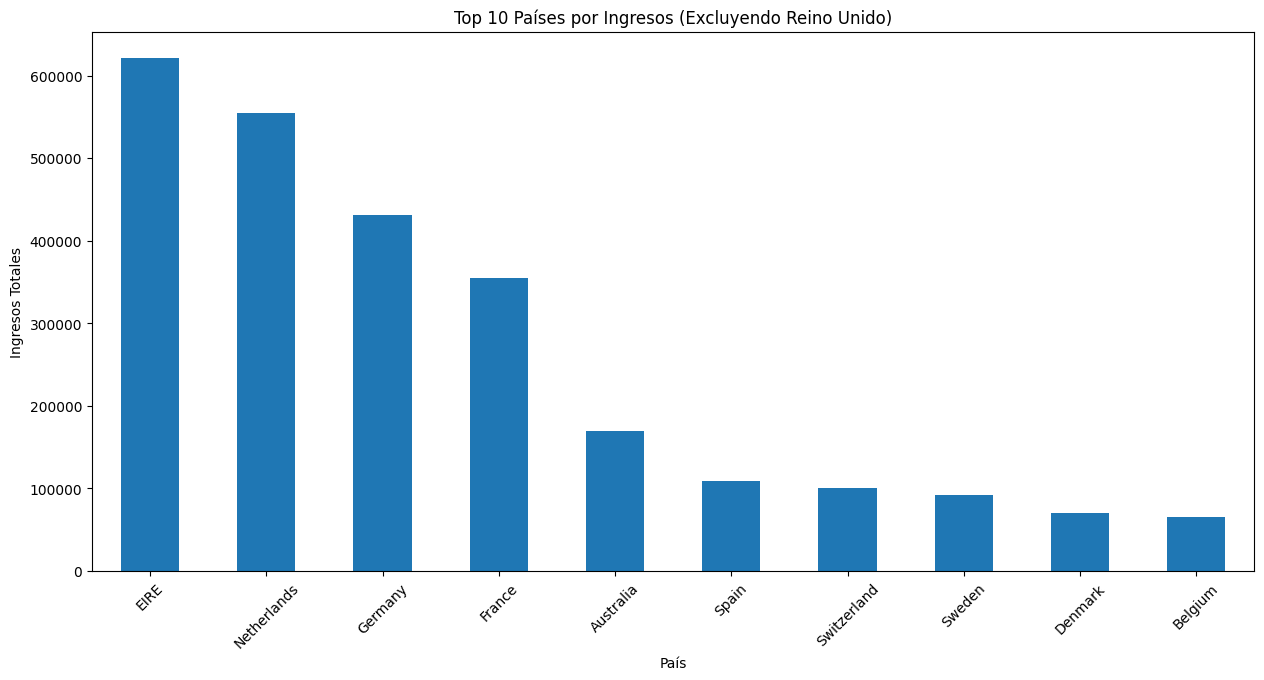

In [17]:

ventas_internacionales = ventas_por_pais.drop('United Kingdom')


plt.figure(figsize=(15, 7))
ventas_internacionales.head(10).plot(kind='bar')
plt.title('Top 10 Países por Ingresos (Excluyendo Reino Unido)')
plt.xlabel('País')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.show()

In [18]:
import pandas as pd


df_limpio['InvoiceDate'] = pd.to_datetime(df_limpio['InvoiceDate'])


snapshot_date = df_limpio['InvoiceDate'].max() + pd.Timedelta(days=1)


rfm_df = df_limpio.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})


rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'Invoice': 'Frequency',
                       'TotalPrice': 'Monetary'}, inplace=True)


print(rfm_df.head())

             Recency  Frequency  Monetary
Customer ID                              
12346            326         12  77556.46
12347              2          8   5633.32
12348             75          5   2019.40
12349             19          4   4428.69
12350            310          1    334.40


In [19]:

r_labels = range(4, 0, -1)
fm_labels = range(1, 5)


rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'].rank(method='first'), q=4, labels=r_labels)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=4, labels=fm_labels)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), q=4, labels=fm_labels)


print(rfm_df.head())

             Recency  Frequency  Monetary R_Score F_Score M_Score
Customer ID                                                      
12346            326         12  77556.46       2       4       4
12347              2          8   5633.32       4       4       4
12348             75          5   2019.40       3       3       3
12349             19          4   4428.69       4       3       4
12350            310          1    334.40       2       1       1


In [20]:

rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)


rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(int) + rfm_df['F_Score'].astype(int) + rfm_df['M_Score'].astype(int)


print(rfm_df.head())

             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment  \
Customer ID                                                                     
12346            326         12  77556.46       2       4       4         244   
12347              2          8   5633.32       4       4       4         444   
12348             75          5   2019.40       3       3       3         333   
12349             19          4   4428.69       4       3       4         434   
12350            310          1    334.40       2       1       1         211   

             RFM_Score  
Customer ID             
12346               10  
12347               12  
12348                9  
12349               11  
12350                4  


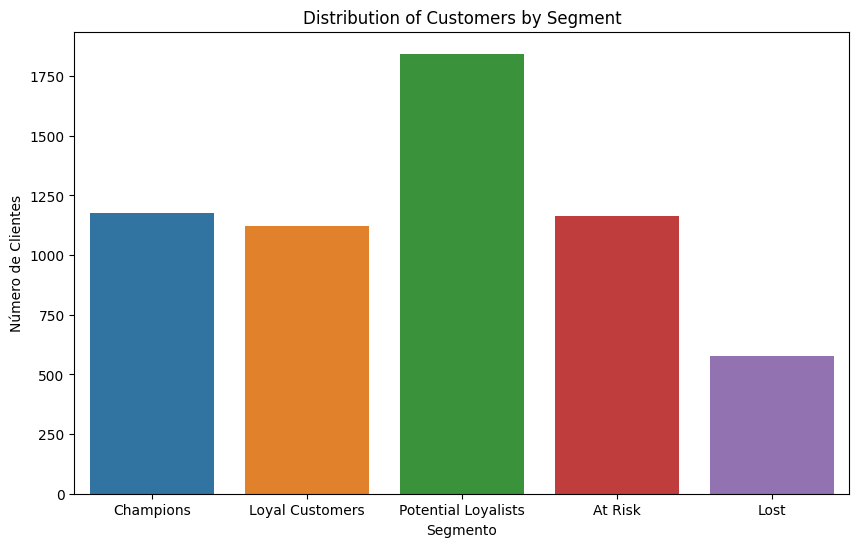

             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment  \
Customer ID                                                                     
12346            326         12  77556.46       2       4       4         244   
12347              2          8   5633.32       4       4       4         444   
12348             75          5   2019.40       3       3       3         333   
12349             19          4   4428.69       4       3       4         434   
12350            310          1    334.40       2       1       1         211   

             RFM_Score          Segment  
Customer ID                              
12346               10  Loyal Customers  
12347               12        Champions  
12348                9  Loyal Customers  
12349               11        Champions  
12350                4          At Risk  


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


def asignar_segmento(score):
    if score >= 11:
        return 'Champions'  
    elif score >= 9:
        return 'Loyal Customers'  
    elif score >= 6:
        return 'Potential Loyalists'  
    elif score >= 4:
        return 'At Risk'  
    else:
        return 'Lost'  


rfm_df['Segment'] = rfm_df['RFM_Score'].apply(asignar_segmento)


segment_counts = rfm_df['Segment'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, order=['Champions', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'Lost'])
plt.title('Distribution of Customers by Segment')
plt.xlabel('Segmento')
plt.ylabel('Número de Clientes')
plt.show()


print(rfm_df.head())